## Download data

In [1]:

from modules import utils
utils.configure_plotly_template(showlegend=True)

## Load data

In [2]:
import pandas as pd

df = pd.read_csv("../../../data/FRED/HOUSTNSA.csv")
df

,observation_date,HOUSTNSA
0,1959-01-01,96.2
1,1959-02-01,99.0
...,...,...
794,2025-03-01,111.3
795,2025-04-01,123.7


## Preprocess data

### Filter time series

To get a table with the unique datetime index of the series, and the time series values.

### Set datetime index

The index must be a datetime object and unique, while the values must be a numeric object.

In [3]:
COLUMN_TEMPORAL = 'observation_date'

In [4]:
df = df.set_index(COLUMN_TEMPORAL).sort_index()
df

,HOUSTNSA
observation_date,
1959-01-01,96.2
1959-02-01,99.0
...,...
2025-03-01,111.3
2025-04-01,123.7


In [5]:
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['1959-01-01', '1959-02-01', '1959-03-01', '1959-04-01',
               '1959-05-01', '1959-06-01', '1959-07-01', '1959-08-01',
               '1959-09-01', '1959-10-01',
               ...
               '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01',
               '2024-11-01', '2024-12-01', '2025-01-01', '2025-02-01',
               '2025-03-01', '2025-04-01'],
              dtype='datetime64[ns]', name='observation_date', length=796, freq=None)

In [6]:
df.index.is_unique

True

In [7]:
COLUMN_VALUES = "HOUSTNSA"

df = df[[COLUMN_VALUES]].copy()
df.columns = ['values']
df

,values
observation_date,
1959-01-01,96.2
1959-02-01,99.0
...,...
2025-03-01,111.3
2025-04-01,123.7


In [8]:
df.plot()

### Filter datetime index

In [9]:
df = df.loc['2000':'2019']
df

,values
observation_date,
2000-01-01,104.0
2000-02-01,119.7
...,...
2019-11-01,103.4
2019-12-01,108.3


### Aggregate

In [10]:
RULE = 'ME'

In [11]:
x = df.resample(RULE).sum()
x.plot(kind='line')

In [12]:
df = x.copy()
df

,values
observation_date,
2000-01-31,104.0
2000-02-29,119.7
...,...
2019-11-30,103.4
2019-12-31,108.3


## Data stationarity

### Data transformation

#### Constant variance

In [13]:
from statsmodels.tsa.stattools import adfuller
adfuller(df["values"])

(np.float64(-2.405598235187122),
 np.float64(0.14016257851870628),
 15,
 224,
 {'1%': np.float64(-3.459884913337196),
  '5%': np.float64(-2.8745310704320794),
  '10%': np.float64(-2.573693840082908)},
 np.float64(1601.2742399504755))

In [14]:
import numpy as np

df["values_log"] = np.log(df["values"])
df = df.dropna()
df

,values,values_log
observation_date,,
2000-01-31,104.0,4.644391
2000-02-29,119.7,4.784989
...,...,...
2019-11-30,103.4,4.638605
2019-12-31,108.3,4.684905


In [15]:
adfuller(df["values_log"])

(np.float64(-2.11437655440679),
 np.float64(0.2387731494216399),
 14,
 225,
 {'1%': np.float64(-3.4597521044060353),
  '5%': np.float64(-2.874472927517147),
  '10%': np.float64(-2.5736628197530864)},
 np.float64(-430.4455335780839))

In [16]:
fig = df.plot(facet_col="variable")
fig.update_yaxes(matches=None)
fig.update_layout()

In [17]:
PERIOD = 12

utils.plot_decomposition_comparison(df["values_log"], period=PERIOD)

#### Constant mean

In [18]:
df['values_log_diff'] = df['values_log'].diff().dropna()
df

,values,values_log,values_log_diff
observation_date,,,
2000-01-31,104.0,4.644391,NaN
2000-02-29,119.7,4.784989,0.140598
...,...,...,...
2019-11-30,103.4,4.638605,-0.104587
2019-12-31,108.3,4.684905,0.046300


In [19]:
df = df.dropna()
df

,values,values_log,values_log_diff
observation_date,,,
2000-02-29,119.7,4.784989,0.140598
2000-03-31,133.4,4.893352,0.108364
...,...,...,...
2019-11-30,103.4,4.638605,-0.104587
2019-12-31,108.3,4.684905,0.046300


In [20]:
fig = df.plot(facet_col="variable")
fig.update_yaxes(matches=None)
fig.update_layout()

In [21]:
adfuller(df["values_log_diff"])

(np.float64(-2.2018353905381467),
 np.float64(0.20557999050341252),
 15,
 223,
 {'1%': np.float64(-3.460018927623594),
  '5%': np.float64(-2.8745897386146817),
  '10%': np.float64(-2.57372514086348)},
 np.float64(-426.0078381805806))

## ACF & PACF


In [22]:
COLUMN = "values"

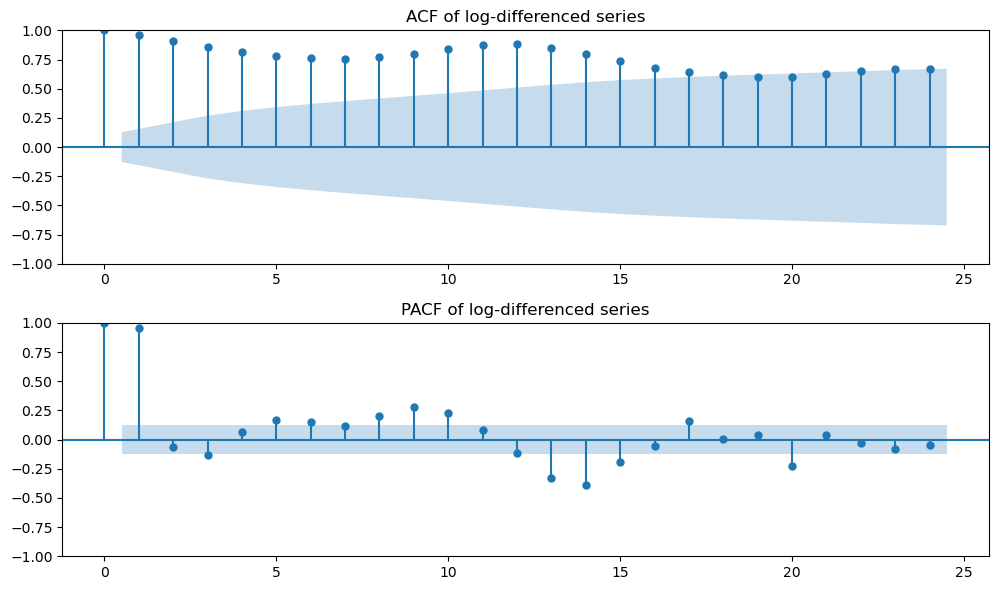

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 6))

plot_acf(df[COLUMN], ax=axes[0])
axes[0].set_title("ACF of log-differenced series")

plot_pacf(df[COLUMN], ax=axes[1])
axes[1].set_title("PACF of log-differenced series")

plt.tight_layout()
plt.show()

## Train test split

In [24]:
df = df[["values", "values_log"]]
df

,values,values_log
observation_date,,
2000-02-29,119.7,4.784989
2000-03-31,133.4,4.893352
...,...,...
2019-11-30,103.4,4.638605
2019-12-31,108.3,4.684905


In [25]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df['values'], test_size=0.3, shuffle=False)

## Variation playground

### Experiment configuration

In [26]:
from modules.utils import TimeSeriesForecaster

In [62]:
configs = {
    "sarima": {
        "model_params": {
            "order": (1, 1, 1),  # (p,d,q) - A common starting point after d=1
            # p=1 for AR, q=1 for MA to capture some dynamics.
            "seasonal_order": (
                1,
                1,
                1,
                12,
            ),  # (P,D,Q,s) - D=1 for seasonal diff, s=12 for annual.
            # P=1 and Q=1 for seasonal AR and MA components.
            # This is a flexible seasonal model.
            "enforce_stationarity": False,  # Kept as per your previous structure for exploration
            "enforce_invertibility": False,  # Kept as per your previous structure for exploration
        },
        "log_transform": True,  # Strongly recommended given the plot
    },
    "ets": {  # Exponential Smoothing
        "model_params": {
            "trend": "add",  # Additive trend on log-transformed data
            "seasonal": "add",  # Additive seasonality on log-transformed data
            # (results in multiplicative seasonality on original scale)
            "seasonal_periods": 12,  # For monthly data with annual seasonality
            "damped_trend": True,  # Consider damping the trend for more robust long-term forecasts,
            # especially if the strong trend in test might not persist
        },
        "log_transform": True,  # Strongly recommended
    },
    "prophet": {
        "model_params": {
            "seasonality_mode": "additive",  # For log-transformed 'y', this correctly models
            # multiplicative seasonality on the original scale.
            "yearly_seasonality": True,  # Assumed primary seasonality for monthly data
            "weekly_seasonality": False,  # Not applicable for monthly data
            "daily_seasonality": False,  # Not applicable for monthly data
            "changepoint_prior_scale": 0.1,  # Increase from default (0.05) for more trend flexibility
            # (Visuals suggest trend changes significantly)
            "seasonality_prior_scale": 15.0,  # Increase from default (10) for more seasonal flexibility
        },
        "log_transform": True,  # Strongly recommended
        # Note: For Prophet, also consider adding custom holidays/regressors if data is event-driven
        # e.g., game updates for "EVE Online player count"
        # m.add_regressor('expansion_released') or m.add_holidays(custom_events_df)
    },
}

# Example of how you might use this (conceptual):
# import numpy as np
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from statsmodels.tsa.holtwinters import ExponentialSmoothing
# from prophet import Prophet

# Assume `your_timeseries_data` is a pandas Series with a DatetimeIndex

# for model_name, config in configs_updated_candidates.items():
#     data_to_fit = your_timeseries_data.copy()
#     if config['log_transform']:
#         data_to_fit = np.log1p(data_to_fit) # Use log1p if data can have zeros, else np.log

#     print(f"\nConfiguring and fitting: {model_name}")

#     if model_name == 'sarima':
#         model = SARIMAX(data_to_fit, **config['model_params'])
#         results = model.fit(disp=False)
#         print(results.summary())
#     elif model_name == 'ets':
#         # Ensure index has frequency for ETS if not inferrable, e.g., data_to_fit.index.freq = 'MS'
#         if data_to_fit.index.freq is None: # Basic check, might need more robust freq setting
#             data_to_fit = data_to_fit.asfreq('MS') # Or appropriate frequency for your data
#         model = ExponentialSmoothing(data_to_fit, **config['model_params'])
#         results = model.fit()
#         print(results.summary())
#     elif model_name == 'prophet':
#         df_prophet = pd.DataFrame({'ds': data_to_fit.index, 'y': data_to_fit.values})
#         model = Prophet(**config['model_params'])
#         # Example: Add known US holidays if relevant (and data is US-based)
#         # model.add_country_holidays(country_name='US')
#         model.fit(df_prophet)
#         # Prophet doesn't have a direct .summary() like statsmodels,
#         # evaluation is typically via predict and metrics.
#         print(f"Prophet model configured and fit.")


In [63]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

metrics = {
    'rmse': root_mean_squared_error,
    'mae': mean_absolute_error,
    'mape': mean_absolute_percentage_error,
}

### Run experiment with all models

In [64]:
from modules.utils import TimeSeriesForecaster

tf = TimeSeriesForecaster(train=train, test=test, freq="ME")
df_forecast = tf.bulk_forecast(configs, metrics=metrics)
df_forecast

12:36:25 - cmdstanpy - INFO - Chain [1] start processing
12:36:25 - cmdstanpy - INFO - Chain [1] done processing


,model,split,values,datetime,rmse,mae,mape
0,sarima,train,"[213.69371967896865, 144.93668606546962, 153.5...","DatetimeIndex(['2001-03-31', '2001-04-30', '20...",10.939871,7.379912,0.074071
1,sarima,test,"[69.48380592790119, 71.80228509901437, 86.9768...","DatetimeIndex(['2014-01-31', '2014-02-28', '20...",23.270167,20.288234,0.200311
...,...,...,...,...,...,...,...
4,prophet,train,"[133.80816599018422, 143.6915392436897, 153.73...","DatetimeIndex(['2001-03-31', '2001-04-30', '20...",6.528771,5.009442,0.053262
5,prophet,test,"[68.93245798845402, 72.80537119748284, 91.6079...","DatetimeIndex(['2014-01-31', '2014-02-28', '20...",91.360384,73.179261,0.715967


## Choose best model

### Forecast plot

In [65]:
df_combined = tf.combine_with_historical(df_forecast)
df_combined

,model,split,datetime,values
0,ets,test,2014-01-31,69.00843
1,ets,test,2014-02-28,73.098748
...,...,...,...,...
902,historical,test,2019-11-30,103.4
903,historical,test,2019-12-31,108.3


In [66]:
import plotly.express as px

fig = px.line(
    data_frame=df_combined,
    x='datetime',
    y='values',
    color='model',
    facet_col='split',
    category_orders={'split': ['train', 'test']}
)

fig.update_xaxes(matches=None)

### Metrics review

In [33]:
dfm = df_forecast.melt(id_vars=["split", "model"], value_vars=["rmse", "mae", "mape"])
dfp = dfm.pivot(index=["split", "model"], columns="variable", values="value")
dfp.style.background_gradient(cmap="Greens_r", axis=0).format(precision=2)

## Diagnostics to validate assumptions

### Model fit

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p, d, q = order = (0, 1, 1)
P, D, Q, s = seasonal_order = (0, 1, 1, 12)

model = SARIMAX(df["values_log"], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

### Residuals

In [35]:
idx_offset = d + D * s

residuals = model_fit.resid[idx_offset:]
residuals

observation_date
2001-03-31    0.099507
2001-04-30    0.047673
                ...   
2019-11-30    0.049964
2019-12-31    0.192347
Freq: ME, Length: 226, dtype: float64

### Assumptions
#### Autocorrelation

##### Plot

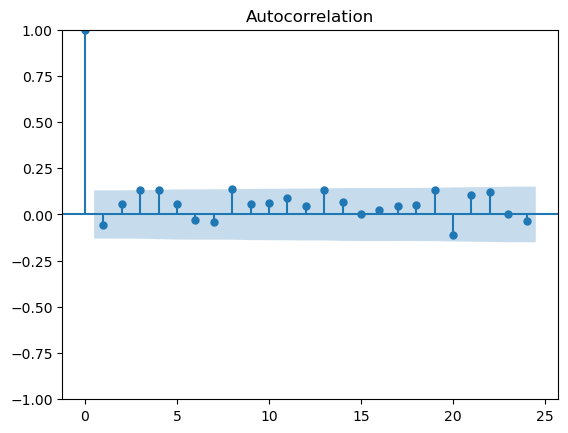

In [36]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals);

##### Test

In [37]:
from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(residuals, lags=[10, 20, 30]).style

,lb_stat,lb_pvalue
10,17.158445,0.070931
20,33.425328,0.030285
30,50.867118,0.010061


#### Normality

##### Plot

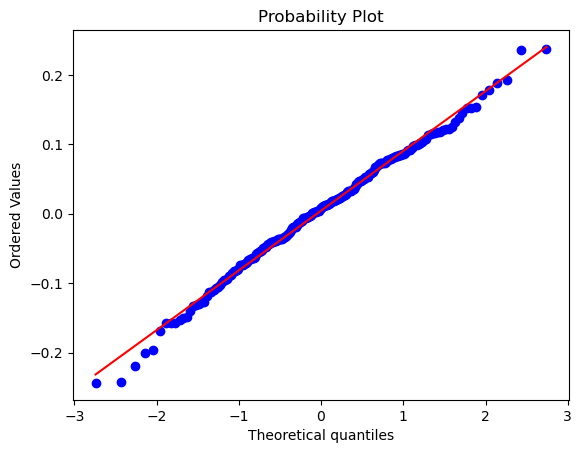

In [38]:
import matplotlib.pyplot as plt
from scipy import stats

fig, ax = plt.subplots()
stats.probplot(residuals, dist='norm', plot=ax);

##### Test

In [39]:
from scipy.stats import jarque_bera
jarque_bera(residuals)

SignificanceResult(statistic=np.float64(1.8415259896654261), pvalue=np.float64(0.3982150890870764))

#### Homoscedasticity

##### Plot

In [40]:
residuals.plot()

##### Test

In [41]:
from statsmodels.stats.diagnostic import het_arch
het_arch(residuals)

(np.float64(13.791168959359723),
 np.float64(0.18273191028436045),
 1.3981533952394654,
 0.18295136166022818)